<a href="https://colab.research.google.com/github/blackgreenc/java/blob/master/School_java_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)
# MNIST Datasets 불러오기 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2.7.0
11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# input data normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

$$ (대상값 - 입력 값의 최솟값) \ / \  (입력 값의 최댓값 - 입력값의 최솟값) $$
$$ 대상값 / 255 $$

In [ ]:
# model create
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
                                        
])

# model compile
mlp_model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# model
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model training
mlp_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9863


In [ ]:
# model evaluation
mlp_model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0708 - accuracy: 0.9768 - 478ms/epoch - 2ms/step


[0.07075171917676926, 0.9768000245094299]

In [ ]:
# cnn model

# data reshape
x_train_4d = x_train.reshape(-1,28, 28, 1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)


# cnn_model create
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# cnn_model compile
cnn_model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# cnn_model
cnn_model.summary()

# cnn_model training
cnn_model.fit(x_train_4d, y_train, epochs= 5)

# cnn_model evaluatioin
cnn_model.evaluate(x_test_4d, y_test, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

[0.03117959015071392, 0.9904999732971191]

In [ ]:
# ResNet model
x_train_4d = x_train.reshape(-1, 28, 28, 1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)

resized_x_train = tf.image.resize( x_train_4d, [32, 32] )
resized_x_test = tf.image.resize( x_test_4d, [32, 32] )

resnet_model = tf.keras.applications.ResNet50V2(
    input_shape = (32, 32, 1), # input data shape
    classes = 10, # 분류할 클래스
    weights = None) # initial weights

#resnet_model.summary()

# model compile
resnet_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

# model training
resnet_model.fit(resized_x_train, y_train, epochs = 5)

# model evaluation
resnet_model.evaluate(resized_x_test, y_test, verbose = 0)

 234/1875 [==>...........................] - ETA: 57:17 - loss: 0.5095 - accuracy: 0.8534

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
myfile = files.upload()

Saving bike.jpg to bike.jpg
Saving bote.jpg to bote.jpg
Saving castle.jpg to castle.jpg
Saving monster.jpg to monster.jpg
Saving sonchaeyoung.jpg to sonchaeyoung.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image # PIL = Python Imaging Library
import os
import numpy as np

#data_dir = 'C:/Users/user/Pictures/tfLite_img'
data_dir = '/content/sample_data/tflistTest'
print(data_dir)
files = os.listdir(data_dir)

images = []

for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

/content/sample_data/tflistTest


In [5]:
import numpy as np
# Data preprocessing.
resized_images = np.array(np.zeros((len(images), 224, 224, 3)))

for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224, 224])

# input data preprocessing
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

NameError: ignored

In [ ]:
# Inference

mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights = "imagenet") # wights를 "imagenet"으로 지정하면 ImageNet데이터로 학습된 모델을 얻을 수 있다

# prediction
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)

topK = 5

y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top = topK) # top인자로 넣은 값만큼 확률이 높은 클래스가 나옴  

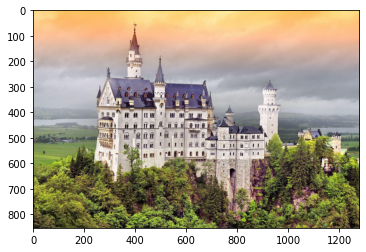

('n02980441', 'castle', 0.98863924) (98.864%)
('n03877845', 'palace', 0.0029725975) (0.297%)
('n03781244', 'monastery', 0.00083235925) (0.083%)
('n11879895', 'rapeseed', 0.000104588835) (0.01%)
('n03028079', 'church', 9.906702e-05) (0.01%)


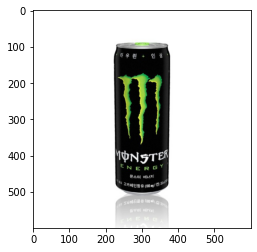

('n03843555', 'oil_filter', 0.6344281) (63.443%)
('n03666591', 'lighter', 0.05808233) (5.808%)
('n03476991', 'hair_spray', 0.03468772) (3.469%)
('n03937543', 'pill_bottle', 0.026641082) (2.664%)
('n04074963', 'remote_control', 0.021577764) (2.158%)


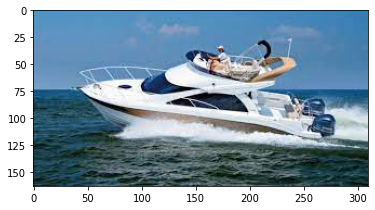

('n04273569', 'speedboat', 0.8393507) (83.935%)
('n02704792', 'amphibian', 0.015415674) (1.542%)
('n04483307', 'trimaran', 0.009073758) (0.907%)
('n09421951', 'sandbar', 0.0036157302) (0.362%)
('n03662601', 'lifeboat', 0.003258617) (0.326%)


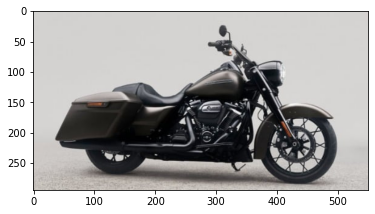

('n03791053', 'motor_scooter', 0.22575724) (22.576%)
('n03785016', 'moped', 0.11434374) (11.434%)
('n03208938', 'disk_brake', 0.04893558) (4.894%)
('n03777568', 'Model_T', 0.027859783) (2.786%)
('n04482393', 'tricycle', 0.025492413) (2.549%)


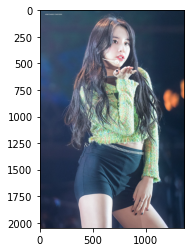

('n03770439', 'miniskirt', 0.24913931) (24.914%)
('n03710637', 'maillot', 0.22556187) (22.556%)
('n03866082', 'overskirt', 0.053225495) (5.323%)
('n04325704', 'stole', 0.049828857) (4.983%)
('n03404251', 'fur_coat', 0.045079798) (4.508%)


In [ ]:
from matplotlib import pyplot as plt

# image print
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    # Probability print
    for k in range(topK):
        print(f'{y_pred_top[i][k]} ({round(y_pred_top[i][k][2] * 100, 3)}%)')

# 새 섹션

In [1]:
# dog and cat image download
import tensorflow_datasets as tfds
tfds.disable_progress_bar() # log를 출력하지 않도록함

raw_train, raw_test = tfds.load(
    'cats_vs_dogs', # data name
    split = ['train[:80%]', 'train[20%:]'],
    as_supervised = True # data shape 결정
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteNUXYSJ/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [6]:
from tensorflow.image import ResizeMethod

def preprocess(image, label): # 대충 전처리하는 거
    out_image = tf.image.resize(image, [96, 96], method=ResizeMethod.BICUBIC)
    out_image = tf.keras.applications.mobilenet_v2.preprocess_input(out_image)
    return out_image, label

batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.image import ResizeMethod

def preprocess(image, label):
    out_image = tf.image.resize(image, [96,96], method = ResizeMethod.BICUBIC)
    out_image = tf.keras.applications.mobilenet_v2.preprocess_input(out_image)
    return out_image, label

batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [9]:
# 사전 학습된 MobileNet 모델 로드
mobilenet_base = tf.keras.applications.MobileNetV2(# model create
    input_shape = (224, 224, 3),
    weights = "imagenet", # imageNet으로 학습된 모델 얻기
    include_top = False # model의 마지막 풀링레이어와 Dense레이어를 제외한 모델을 얻을 수 있다.
)

mobilenet_base.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
mobilenet_base.trainable = False

mobilenet_model = tf.keras.Sequential([
    mobilenet_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1)
])

mobilenet_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

mobilenet_model.fit(train_batch, epochs = 5)
mobilenet_model.evaluate(test_batch, verbose = 2)

Epoch 1/5


ValueError: ignored

In [15]:
pip install tensorflow-hub

In [17]:
# dogs and cats image data import
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

raw_train, raw_test = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[20%:]'],
    as_supervised = True
)